# Web scraping in Python
### by [Jason DeBacker](http://jasondebacker.com), October 2019

This notebook provides a tutorial and examples showing how to scrape webpages with Python in order to gather data.

## Beautiful Soup

There are a number of Python packages that are useful for web scraping, but we'll use [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/).  This may be the most used package for general web scraping and it allows a lot of flexibility.

Beautiful Soup helps you to gather data by parsing HTML and XML code and returning a "soup" object.  The soup object has all of the data in the HTML/XML code that was parsed, but now with some additional structure that allows you to easily pull out particular components of the HTML/XML such as a title, table, image, etc.

Below, we'll apply Beautiful Soup to several examples that illustrate how to pull data from webpages with different structures. 

## Example 1: Wikipedia

Let's scrape the season schedule and results for the 1980 Georgia Bulldogs football team from Wikipedia.  The page can be found [here](https://en.wikipedia.org/wiki/1980_Georgia_Bulldogs_football_team).  What we are interested in is this table:

![1980 Georgia Bulldogs Schedule](files/images/UGA1980results.png)


In [8]:
# import packages
from bs4 import BeautifulSoup
import urllib.request

# give URL and header
wiki = "https://en.wikipedia.org/wiki/1980_Georgia_Bulldogs_football_team"
header = {'User-Agent': 'Mozilla/5.0'} #Needed to prevent 403 error on Wikipedia

# Make the request to get served the webpage, "soupify" it
req = urllib.request.Request(wiki, headers=header)
page = urllib.request.urlopen(req)
soup = BeautifulSoup(page, 'lxml')
 
# # what does the soup object contain
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   1980 Georgia Bulldogs football team - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"1980_Georgia_Bulldogs_football_team","wgTitle":"1980 Georgia Bulldogs football team","wgCurRevisionId":919978601,"wgRevisionId":919978601,"wgArticleId":14272931,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["NCAA team season with no sport parameter","Pages using CFB schedule with named parameters","Articles with hCards","All articles with unsourced statements","Articles with unsourced statements from August 2016","1980 Southeastern Conference football season","Georgia Bulldogs football seasons","College football national champions","Southeastern Conference football champion seasons","Sugar Bowl cham

In [9]:
# extract the table by pulling information from the wikitable class
# There's only one table like this here, so that makes it easier
table = soup.find("table", {"class": "wikitable"})
print(table)

<table class="wikitable" style="font-size:95%"><tbody><tr><th>Date</th><th>Time</th><th>Opponent</th><th>Rank</th><th>Site</th><th>TV</th><th>Result</th><th>Attendance</th></tr><tr class="CFB-schedule-row" style="background-color:#DDFFDD"><td style="white-space:nowrap">September 6</td><td style="white-space:nowrap">7:30 p.m.</td><td style="white-space:nowrap">at <a href="/wiki/1980_Tennessee_Volunteers_football_team" title="1980 Tennessee Volunteers football team">Tennessee</a></td><td style="white-space:nowrap">No. 16</td><td><div class="hlist"><ul><li><a href="/wiki/Neyland_Stadium" title="Neyland Stadium">Neyland Stadium</a></li><li><a href="/wiki/Knoxville,_Tennessee" title="Knoxville, Tennessee">Knoxville, TN</a> (<a href="/wiki/Georgia%E2%80%93Tennessee_football_rivalry" title="Georgia–Tennessee football rivalry">rivalry</a>)</li></ul></div></td><td></td><td style="white-space:nowrap"><span style="display:inline-block; font-weight:bold; width:1em">W</span> 16–15</td><td style="te

In [10]:
# create a dictionary in which to store data
# the keys will be the column names, the values lists
# containing the element in each row in that column
uga_1980 = {'date': [], 'time': [], 'opponent': [], 'rank': [], 'site': [],
            'tv': [], 'result': [], 'attendance': []}

# iterate through the table, pulling out each row
for row in table.findAll("tr"):
    cells = row.findAll("td")
    #For each "tr", assign each "td" to a variable.
    if len(cells) == 8:
        uga_1980['date'].append(cells[0].find(text=True))
        uga_1980['time'].append(cells[1].findAll(text=True))
        uga_1980['opponent'].append(cells[2].findAll(text=True))
        uga_1980['rank'].append(cells[3].find(text=True))
        uga_1980['site'].append(cells[4].findAll(text=True))
        uga_1980['tv'].append(cells[5].find(text=True))
        uga_1980['result'].append(cells[6].find(text=True))
        uga_1980['attendance'].append(cells[7].find(text=True))

In [11]:
# Look at this dictionary
uga_1980

{'date': ['September 6',
  'September 13',
  'September 20',
  'September 27',
  'October 11',
  'October 18',
  'October 25',
  'November 1',
  'November 8',
  'November 15',
  'November 29',
  'January 1, 1981'],
 'time': [['7:30 p.m.'],
  ['1:30 p.m.'],
  ['1:30 p.m.'],
  ['1:30 p.m.'],
  ['1:30 p.m.'],
  ['1:30 p.m.'],
  ['7:30 p.m.'],
  ['12:35 p.m.'],
  ['12:35 p.m.'],
  ['2:30 p.m.'],
  ['1:30 p.m.'],
  ['2:00 p.m.']],
 'opponent': [['at ', 'Tennessee'],
  ['Texas A&M', '*'],
  ['Clemson', '*'],
  ['TCU', '*'],
  ['Ole Miss'],
  ['Vanderbilt'],
  ['at ', 'Kentucky'],
  ['No.\xa014 ', 'South Carolina', '*'],
  ['vs. No.\xa020 ', 'Florida'],
  ['at ', 'Auburn'],
  ['Georgia Tech', '*'],
  ['vs. No.\xa07 ', 'Notre Dame', '*']],
 'rank': ['No. 16',
  'No. 12',
  'No. 10',
  'No. 10',
  'No. 6',
  'No. 6',
  'No. 5',
  'No. 4',
  'No. 2',
  'No. 1',
  'No. 1',
  'No. 1'],
 'site': [['Neyland Stadium', 'Knoxville, TN', ' (', 'rivalry', ')'],
  ['Sanford Stadium', 'Athens, GA'],
  ['Sa

In [12]:
# put this in a dataframe and format it
import pandas as pd

uga_1980_df = pd.DataFrame(uga_1980)
uga_1980_df

,date,time,opponent,rank,site,tv,result,attendance
0,September 6,[7:30 p.m.],"[at , Tennessee]",No. 16,"[Neyland Stadium, Knoxville, TN, (, rivalry, )]",None,W,"95,288"
1,September 13,[1:30 p.m.],"[Texas A&M, *]",No. 12,"[Sanford Stadium, Athens, GA]",None,W,"60,150"
2,September 20,[1:30 p.m.],"[Clemson, *]",No. 10,"[Sanford Stadium, Athens, GA (, rivalry, )]",None,W,"61,800"
3,September 27,[1:30 p.m.],"[TCU, *]",No. 10,"[Sanford Stadium, Athens, GA]",None,W,"59,200"
4,October 11,[1:30 p.m.],[Ole Miss],No. 6,"[Sanford Stadium, Athens, GA]",None,W,"60,300"
5,October 18,[1:30 p.m.],[Vanderbilt],No. 6,"[Sanford Stadium, Athens, GA (, rivalry, )]",None,W,"59,300"
6,October 25,[7:30 p.m.],"[at , Kentucky]",No. 5,"[Commonwealth Stadium, Lexington, KY]",None,W,"57,239"
7,November 1,[12:35 p.m.],"[No. 14 , South Carolina, *]",No. 4,"[Sanford Stadium, Athens, GA (, rivalry, )]",ABC,W,"62,200"
8,November 8,[12:35 p.m.],"[vs. No. 20 , Florida]",No. 2,"[Gator Bowl Stadium, Jacksonville, FL, (, riv...",ABC,W,"68,528"
9,November 15,[2:30 p.m.],"[at , Auburn]",No. 1,"[Jordan–Hare Stadium, Auburn, AL, (, Deep Sou...",None,W,"74,900"


From here, we can reformat the dates and numeric values into approproriate types as well as change some of text to drop characters like "[".  This will just be working with DataFrames and Python's types.

Instead of this, let's think about how to gather more data.  Sticking with this example, let's try to gather all tof the results for Georgia Football from 1980 to 2016.  

Start by looking for patterns in how the data is presented.  The url for the 1980 season is `https://en.wikipedia.org/wiki/1980_Georgia_Bulldogs_football_team`, for the 1981 season: `https://en.wikipedia.org/wiki/1981_Georgia_Bulldogs_football_team`, and for the 2016 season: `https://en.wikipedia.org/wiki/2016_Georgia_Bulldogs_football_team`.  So we can see the pattern in the urls.  This will help us as we scrape multiple years of data.

Lookig at each of these pages, we notice some differences.  For example, there are more tables on the page for the 2016 season than for the 1980 season.  So there may be some work we have to do here, but lets' start out by trying to loop over all the seasons, doing what we did above.

In [17]:
# create empty dataframe
uga_df = pd.DataFrame(columns=['date', 'opponent', 'rank',
                               'site', 'tv', 'result', 'attendance', 'year'])

# create a dictionary in which to store data
# the keys will be the column names, the values lists
# containing the element in each row in that column
results_dict = {'date': [], 'opponent': [], 'rank': [], 'site': [],
                'tv': [], 'result': [], 'attendance': [], 'year': []}

# Loop over years
for year in range(1980, 2018):
    # give URL and header
    wiki = "https://en.wikipedia.org/wiki/" + str(year) + "_Georgia_Bulldogs_football_team"
    header = {'User-Agent': 'Mozilla/5.0'} #Needed to prevent 403 error on Wikipedia

    # Make the request to get served the webpage, "soupify" it
    req = urllib.request.Request(wiki,headers=header)
    page = urllib.request.urlopen(req)
    soup = BeautifulSoup(page, 'lxml')

    # extract the table by pulling information from the wikitable class
    # There's only one table like this here, so that makes it easier
    table = soup.find("table", {"class": "wikitable"})

    # iterate through the table, pulling out each row
    for row in table.findAll("tr"):
        cells = row.findAll("td")
        #For each "tr", assign each "td" to a variable.
        print('Length of row  = ', len(cells))
        if len(cells) == 7:
            results_dict['date'].append(cells[0].find(text=True))
            results_dict['opponent'].append(cells[1].findAll(text=True))
            results_dict['rank'].append(cells[2].find(text=True))
            results_dict['site'].append(cells[3].findAll(text=True))
            results_dict['tv'].append(cells[4].find(text=True))
            results_dict['result'].append(cells[5].find(text=True))
            results_dict['attendance'].append(cells[6].find(text=True))
            results_dict['year'].append(year)
        elif len(cells) == 8:
            uga_1980['date'].append(cells[0].find(text=True))
            uga_1980['time'].append(cells[1].findAll(text=True))
            uga_1980['opponent'].append(cells[2].findAll(text=True))
            uga_1980['rank'].append(cells[3].find(text=True))
            uga_1980['site'].append(cells[4].findAll(text=True))
            uga_1980['tv'].append(cells[5].find(text=True))
            uga_1980['result'].append(cells[6].find(text=True))
            uga_1980['attendance'].append(cells[7].find(text=True))

    print('Year = ', year)

Length of row  =  0
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  1
Year =  1980
Length of row  =  0
Length of row  =  7
Length of row  =  7
Length of row  =  7
Length of row  =  7
Length of row  =  7
Length of row  =  7
Length of row  =  7
Length of row  =  7
Length of row  =  7
Length of row  =  7
Length of row  =  7
Length of row  =  7
Length of row  =  1
Year =  1981
Length of row  =  0
Length of row  =  7
Length of row  =  7
Length of row  =  7
Length of row  =  7
Length of row  =  7
Length of row  =  7
Length of row  =  7
Length of row  =  7
Length of row  =  7
Length of row  =  7
Length of row  =  7
Length of row  =  7
Length of row  =  1
Year =  1982
Length of row  =  0
Length of row  =  7
Length of row  =  7
Length of row  =  7
Length of row  =  7
Length of row  =  7
L

Length of row  =  0
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  1
Year =  2010
Length of row  =  0
Length of row  =  4
Length of row  =  4
Length of row  =  4
Length of row  =  4
Length of row  =  4
Length of row  =  4
Length of row  =  4
Length of row  =  4
Length of row  =  4
Length of row  =  4
Length of row  =  1
Year =  2011
Length of row  =  0
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  8
Length of row  =  1
Year =  2012
Length of row  =  0
Length of row  =  4
Length of row  =  4
Length of row  =  4
Length of row  =  4
L

In [19]:
uga_df = pd.DataFrame(results_dict)
uga_df

,date,opponent,rank,site,tv,result,attendance,year
0,September 5,[Tennessee],No. 10,"[Sanford Stadium, Athens, GA, (, rivalry, )]",None,W,"79,600",1981
1,September 12,"[California, *]",No. 6,"[Sanford Stadium, Athens, GA]",None,W,"79,400",1981
2,September 19,"[at , Clemson, *]",No. 4,"[Memorial Stadium, Clemson, SC, (, rivalry, )]",None,L,"62,466",1981
3,September 26,"[South Carolina, *]",No. 17,"[Sanford Stadium, Athens, GA (, rivalry, )]",None,W,"82,100",1981
4,October 10,"[at , Ole Miss]",No. 11,"[Vaught–Hemingway Stadium, Oxford, MS]",None,W,"41,125",1981
...,...,...,...,...,...,...,...,...
113,October 26,[7:00 p.m.],at,"[Commonwealth Stadium, Lexington, KY]",None,L,"34,000",1996
114,November 2,[3:30 p.m.],vs. No. 1,"[Alltel Stadium, Jacksonville, FL, (, rivalry...",CBS,L,"84,103",1996
115,November 16,[3:30 p.m.],at No. 20,"[Jordan–Hare Stadium, Auburn, AL, (, Deep Sou...",CBS,W,"85,214",1996
116,November 23,[12:30 p.m.],Ole Miss,"[Sanford Stadium, Athens, GA]",JPS,L,"76,511",1996


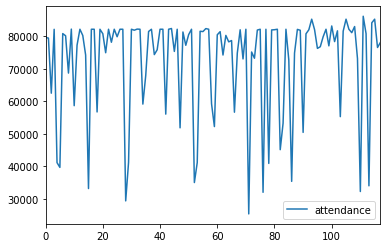

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline 
uga_df['attendance'] = uga_df['attendance'].astype(str).str.replace(",", "").astype(float) 
uga_df.plot(y='attendance', kind='line')
plt.show()

## Example 2: Scraping Yellowpages.com

Here well grab information from a search of yellowpages.com

![YP.com Screenshot](files/images/YP_search.png)


In [26]:
# import package
import requests

# give url for search of Columbia, SC restaurants
r = requests.get('https://www.yellowpages.com/search?search_terms=restaurant&geo_location_terms=Columbia%2C+SC')
r.content

# parse webpage with BS
soup = BeautifulSoup(r.content, 'lxml') #note - setting parser to lxml
yellowpages_data = soup.find_all("div", {"class":"info"})

yellowpages_data[0]
# soup.prettify()
# len(yellowpages_data)

<div class="info"><h2 class="n"><span class="ad-pill">Ad</span><a class="business-name" href="/west-columbia-sc/mip/south-congaree-house-of-pizza-family-restaurant-3547310?lid=1001632757181">South Congaree House of Pizza &amp; Family Restaurant</a></h2><div class="info-section info-primary"><div class="categories"><a data-analytics='{"click_id":1171,"adclick":false}' href="/columbia-sc/restaurants">Restaurants</a><a data-analytics='{"click_id":1171,"adclick":false}' href="/columbia-sc/pizza">Pizza</a></div></div><div class="info-section info-secondary"><div class="phone">(803) 636-2054</div><p class="adr">714 Main St, West Columbia, SC 29170</p></div><div class="links"><a data-analytics='{"click_id":6}' href="http://www.southcongareehouseofpizza.com/" rel="nofollow" target="_blank">Website</a><a data-analytics='{"click_id":13}' href="/listings/1001632757181/directions">Directions</a><a data-analytics='{"click_id":7}' href="/west-columbia-sc/mip/south-congaree-house-of-pizza-family-rest

In [31]:
yellowpages_data[0].contents

[<h2 class="n"><span class="ad-pill">Ad</span><a class="business-name" href="/west-columbia-sc/mip/south-congaree-house-of-pizza-family-restaurant-3547310?lid=1001632757181">South Congaree House of Pizza &amp; Family Restaurant</a></h2>,
 <div class="info-section info-primary"><div class="categories"><a data-analytics='{"click_id":1171,"adclick":false}' href="/columbia-sc/restaurants">Restaurants</a><a data-analytics='{"click_id":1171,"adclick":false}' href="/columbia-sc/pizza">Pizza</a></div></div>,
 <div class="info-section info-secondary"><div class="phone">(803) 636-2054</div><p class="adr">714 Main St, West Columbia, SC 29170</p></div>,
 <div class="links"><a data-analytics='{"click_id":6}' href="http://www.southcongareehouseofpizza.com/" rel="nofollow" target="_blank">Website</a><a data-analytics='{"click_id":13}' href="/listings/1001632757181/directions">Directions</a><a data-analytics='{"click_id":7}' href="/west-columbia-sc/mip/south-congaree-house-of-pizza-family-restaurant-3

In [24]:
# print restaurant names
for item in yellowpages_data:
    try:
        print(item.contents[0].find_all("a",{"class":"business-name"})[0].text)
    except:
        pass

South Congaree House of Pizza & Family Restaurant
California Dreaming
Motor Supply Co Bistro
Sato Japanese Restaurant
Chinese American House
Original Pancake House The
Wing Zone
Nathan's Restaurant
Ruth's Chris Steak House
Oceanview Seafood Restaurant
Copper River Grill
Villa On Bush River
Golden Corral Restaurants
Tombo Grille
Texas Roadhouse
Gervais & Vine
Pawleys Front Porch
Beef 'O' Bradys
Bamboo House
SakiTumi Grill & Sushi Bar
American Roadside Burgers
Cool Beans Coffee Co
Mikino's Diner
Fazoli's
Takosushi
Tin Roof Columbia
Genji
Cafe Caturra
Cowboy Brazilian Steakhouse
American Italian Pasta Co
Chili's Grill & Bar
Sato Japanese Restaurant
Bryan's Restaurant Service Inc
Hite's Bar-B-Que
South Congaree House of Pizza & Family Restaurant
Eggroll Station
Chinese American House
Andy's Delicatessen Inc
Mediterranean Tea Room
Original Pancake House The
Wing Zone
Motor Supply Co Bistro
Murray's Neighborhood Grill
Papa John's (Sumter)


Note that these are just results for one page and there are a number of pages of results.  We can get those others too.  To do that, let's determine the number of pages and go to each page.  

A first step is to note the format of the results of additional pages.  Here's the url of the first page:

`https://www.yellowpages.com/search?search_terms=restuarant&geo_location_terms=Columbia%2C+SC`

And the second:

`https://www.yellowpages.com/search?search_terms=restuarant&geo_location_terms=Columbia%2C%20SC&page=2`

We can see a pattern. Let's exploit this.

In [32]:
soup

<!DOCTYPE html>
<html lang="en"><head><meta content="utf-8" name="charset"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width, initial-scale=.75, maximum-scale=1" name="viewport"/><title>Best 30 Restaurant in Columbia, SC with Reviews - YP.com</title><meta content="Popular &amp; reviewed Restaurant in Columbia, SC. Find reviews, menus, book a table, or even order online - THE REAL YELLOW PAGES®" name="description"/><meta content="noindex, follow" name="robots"/><meta content="app-id=284806204, app-argument=ypmobile://srp?search_category=restaurant&amp;latitude=34.0007104&amp;longitude=-81.0348144" name="apple-itunes-app"/><meta content="website" property="og:type"/><meta content="Best 30 Restaurant in Columbia, SC with Reviews - YP.com" property="og:title"/><meta content="Popular &amp; reviewed Restaurant in Columbia, SC. Find reviews, menus, book a table, or even order online - THE REAL YELLOW PAGES®" property="og:description"/><meta content="//i1

In [33]:
# import
import re

result_string = soup.find('div', attrs={'class': 'pagination'}).text

numResults = float((re.search('found(.*)results', result_string)).group(1))
print("Number of results : ", numResults)
pages = int(numResults/30) # checked results page to see that 30 displayed per page as default
print('Number of pages = ', pages)

Number of results :  1257.0
Number of pages =  41


In [34]:
# Now loop over pages of results
# Lots of them, so let's put in list and not print them all
restaurant_list = []
for i in range(1, pages+1):
    if i == 1:
        url = ('https://www.yellowpages.com/search?search_terms='+
                'restuarant&geo_location_terms=Columbia%2C+SC')
    else:
        url = ('https://www.yellowpages.com/search?search_terms='+
               'restuarant&geo_location_terms=Columbia%2C%20SC&page=' + str(i))
    r = requests.get(url)
    r.content

    # parse webpage with BS
    soup = BeautifulSoup(r.content, 'lxml') #note - setting parser to lxml
    yellowpages_data = soup.find_all("div", {"class":"info"})
    
    # append names to list
    for item in yellowpages_data:
        try:
            restaurant_list.append(item.contents[0].
                                   find_all("a",{"class":"business-name"})[0].text)
        except:
            pass
    print("Finished page ", i, " results")
    
print(len(restaurant_list))

Finished page  1  results
Finished page  2  results
Finished page  3  results
Finished page  4  results
Finished page  5  results
Finished page  6  results
Finished page  7  results
Finished page  8  results
Finished page  9  results
Finished page  10  results
Finished page  11  results
Finished page  12  results
Finished page  13  results
Finished page  14  results
Finished page  15  results
Finished page  16  results
Finished page  17  results
Finished page  18  results
Finished page  19  results
Finished page  20  results
Finished page  21  results
Finished page  22  results
Finished page  23  results
Finished page  24  results
Finished page  25  results
Finished page  26  results
Finished page  27  results
Finished page  28  results
Finished page  29  results
Finished page  30  results
Finished page  31  results
Finished page  32  results
Finished page  33  results
Finished page  34  results
Finished page  35  results
Finished page  36  results
Finished page  37  results
Finished p

In [36]:
restaurant_list

['South Congaree House of Pizza & Family Restaurant',
 'California Dreaming',
 'Motor Supply Co Bistro',
 'Sato Japanese Restaurant',
 'Chinese American House',
 'Original Pancake House The',
 'Wing Zone',
 "Nathan's Restaurant",
 "Ruth's Chris Steak House",
 'Oceanview Seafood Restaurant',
 'Copper River Grill',
 'Villa On Bush River',
 'Golden Corral Restaurants',
 'Tombo Grille',
 'Texas Roadhouse',
 'Gervais & Vine',
 'Pawleys Front Porch',
 "Beef 'O' Bradys",
 'Bamboo House',
 'SakiTumi Grill & Sushi Bar',
 'American Roadside Burgers',
 'Cool Beans Coffee Co',
 "Mikino's Diner",
 "Fazoli's",
 'Takosushi',
 'Tin Roof Columbia',
 'Genji',
 'Cafe Caturra',
 'Cowboy Brazilian Steakhouse',
 'American Italian Pasta Co',
 "Chili's Grill & Bar",
 'Sato Japanese Restaurant',
 "Bryan's Restaurant Service Inc",
 "Hite's Bar-B-Que",
 'South Congaree House of Pizza & Family Restaurant',
 'Eggroll Station',
 'Chinese American House',
 "Andy's Delicatessen Inc",
 'Mediterranean Tea Room',
 'Orig